## **Project 2**

Directory ID: swarajmr
Name: Swaraj Mundruppady Rao
UID: 120127007

Problem 2 :

In [41]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import pandas as pd

I have used Scale-Invariant Feature Transform (SIFT) because of the following reasons:


1.   SIFT is a widely used feature extraction algorithm` that detects and describes local features in images. It is invariant to scaling, rotation, and partially invariant to affine transformations and changes in illumination.
2.   SIFT is known for its robustness against viewpoint changes and occlusion, making it suitable for tasks like object recognition, image stitching, and 3D reconstruction.






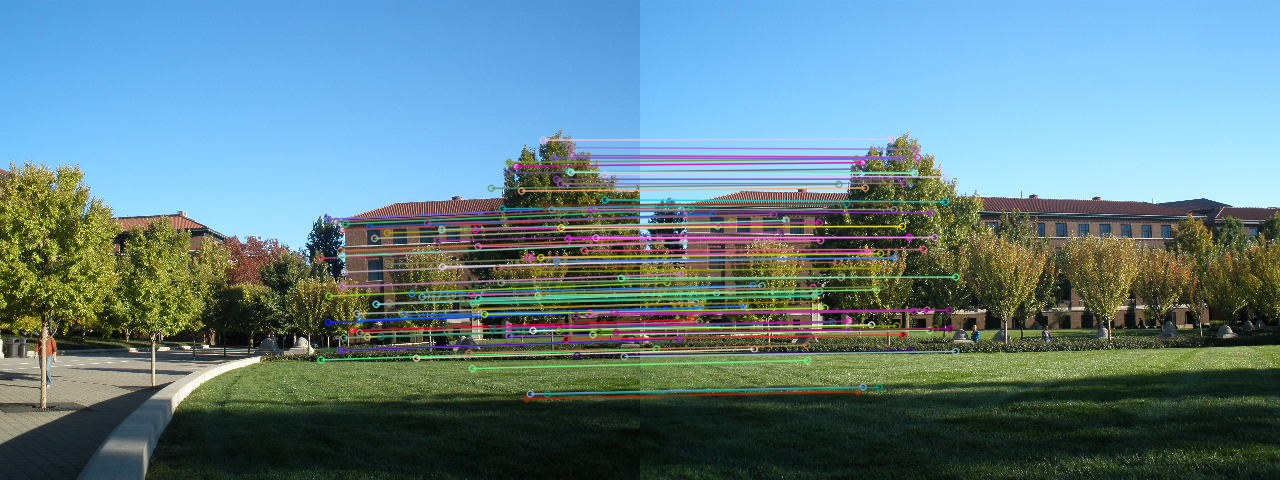

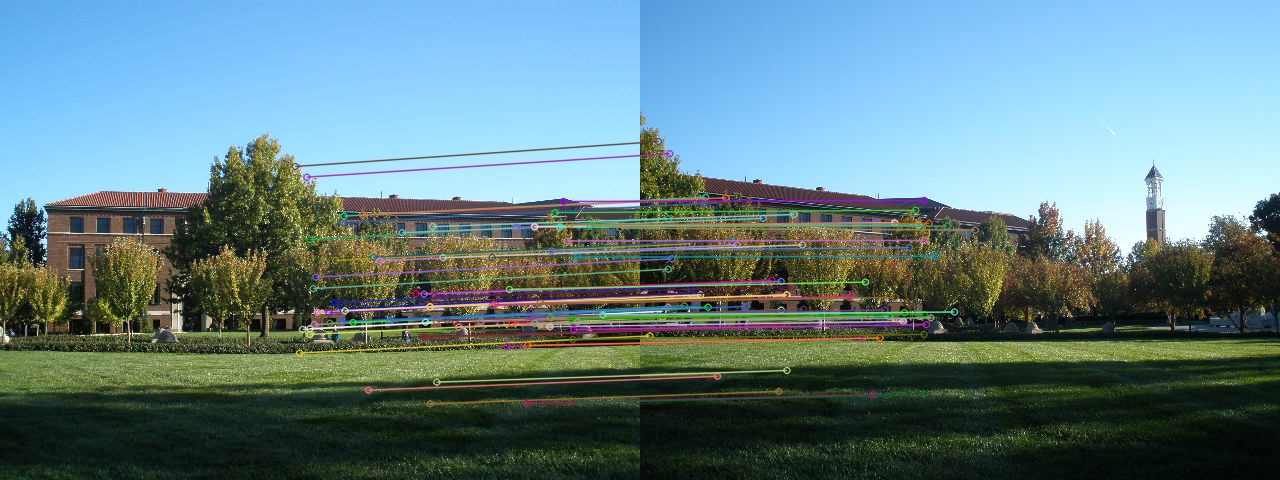

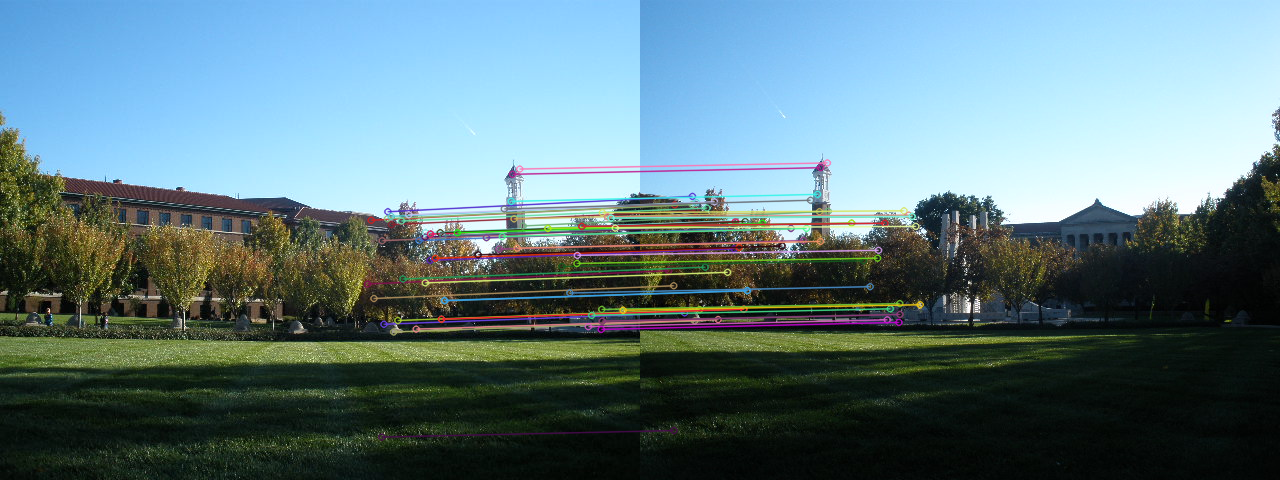

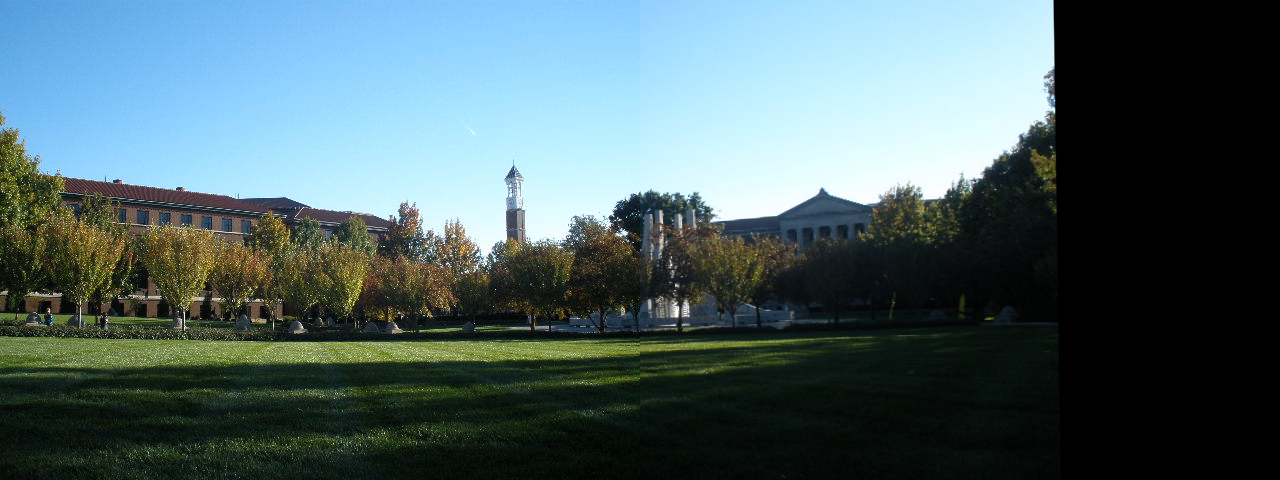

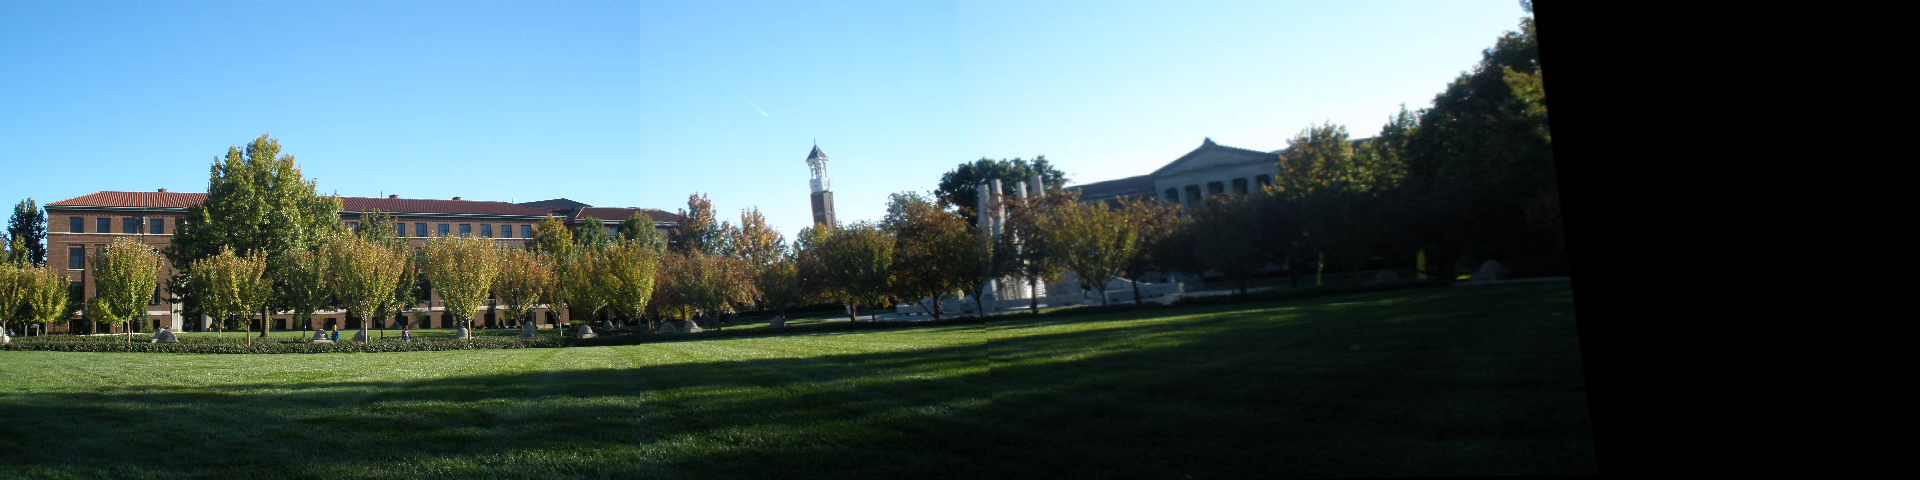

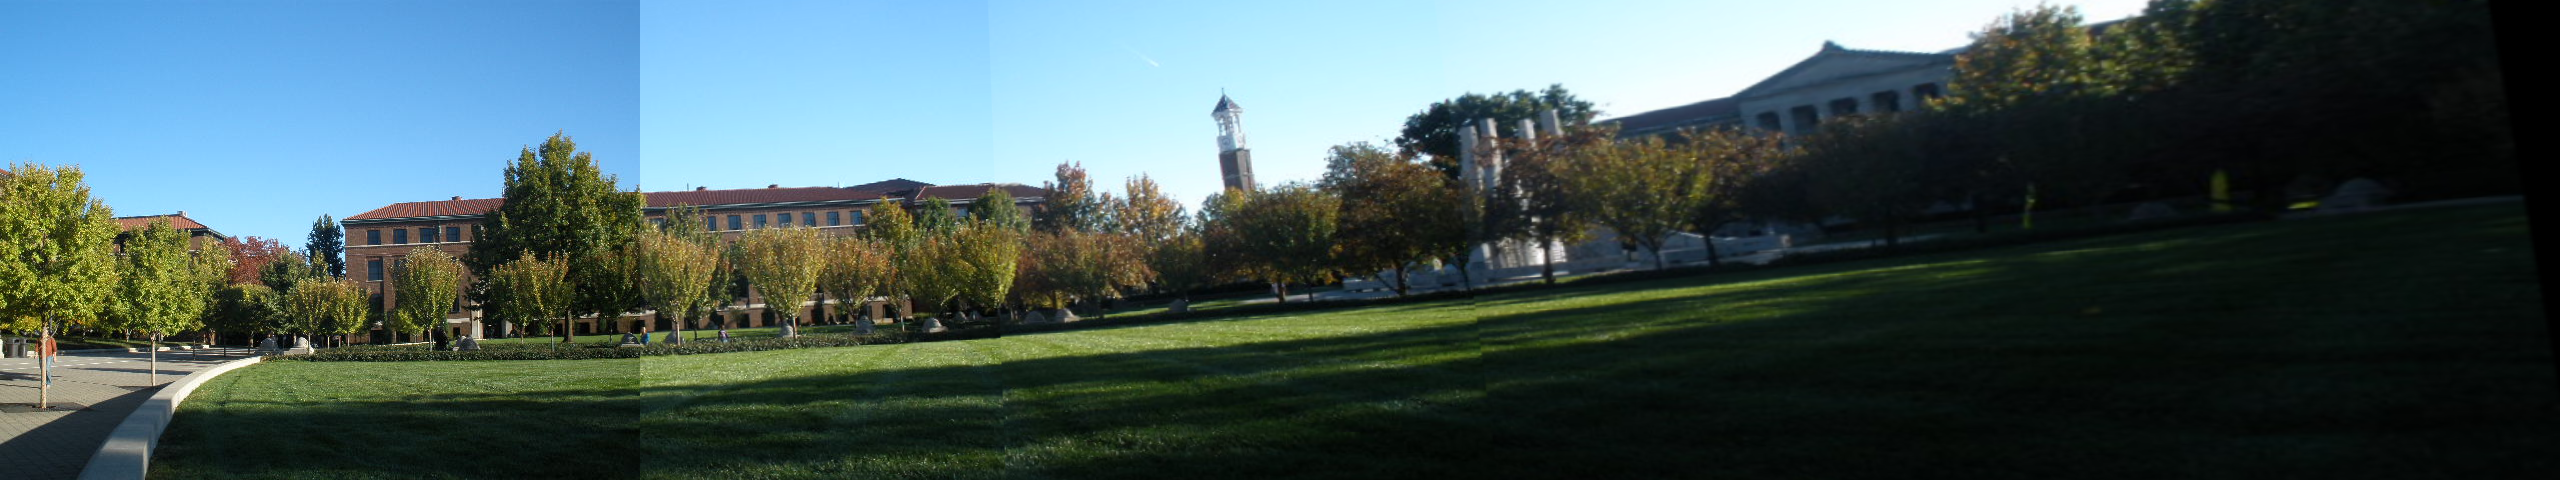

In [44]:
import cv2
import numpy as np

#initilalize the SIFT detector
sift = cv2.SIFT_create()
path = ["/content/drive/MyDrive/ENPM673/Project2/images/PA120275.JPG","/content/drive/MyDrive/ENPM673/Project2/images/PA120274.JPG","/content/drive/MyDrive/ENPM673/Project2/images/PA120273.JPG","/content/drive/MyDrive/ENPM673/Project2/images/PA120272.JPG"]
resized_image=[]
scale = 1
for images in path:
    img=cv2.imread(images)
    img_resized = cv2.resize(img, None, fx=scale, fy=scale)
    resized_image.append(img_resized)
threshold = 0.5
#function to match points
def match_ponits_knn_flann(first_image,second_image):
    gray_img1= cv2.cvtColor(first_image, cv2.COLOR_BGR2GRAY)
    gray_img2= cv2.cvtColor(second_image, cv2.COLOR_BGR2GRAY)
    keypoints_1, descriptors_1 = sift.detectAndCompute(gray_img1, None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(gray_img2, None)
    matching_features_1 = cv2.FlannBasedMatcher()
    features_matched_1 = matching_features_1.knnMatch(descriptors_1, descriptors_2, k=2)
    best_matched_keypoints = []
    for i,j in features_matched_1:
        if i.distance < threshold*j.distance:
            best_matched_keypoints.append(i)
    image_match = cv2.drawMatches(first_image, keypoints_1, second_image, keypoints_2, best_matched_keypoints, None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    return image_match

#function to combine images
def panaroma(first_image,second_image):
    #converting to gray scale
    gray_img1= cv2.cvtColor(first_image, cv2.COLOR_BGR2GRAY)
    gray_img2= cv2.cvtColor(second_image, cv2.COLOR_BGR2GRAY)
    #getting keypoints and descriptors
    keypoints_1, descriptors_1 = sift.detectAndCompute(gray_img1, None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(gray_img2, None)
    #FlannMatcher
    matching_features_1 = cv2.FlannBasedMatcher()
    features_matched_1 = matching_features_1.knnMatch(descriptors_1, descriptors_2, k=2)
    pts1,pts2=[],[]
    #Getting the keypoints and filtering
    for i,(m,n) in enumerate(features_matched_1):
        if m.distance < 0.7*n.distance:
            pts2.append(keypoints_2[m.trainIdx].pt)
            pts1.append(keypoints_1[m.queryIdx].pt)
    pts1 = np.float32(pts1)
    pts2 = np.float32(pts2)
    #Computing Homography
    M , mask = cv.findHomography(pts2, pts1, cv.RANSAC, ransacReprojThreshold = 3)
    #Stiching the images using Homography
    stitch_image = cv2.warpPerspective(second_image, M, ((first_image.shape[1] + second_image.shape[1]), second_image.shape[0]))
    stitch_image[0:first_image.shape[0], 0:first_image.shape[1]] = first_image
    cv2_imshow(stitch_image)
    return stitch_image

for i in range(len(resized_image) - 1):
    # Match the features and visualize them in the first and second image
    stitched = match_ponits_knn_flann(resized_image[i], resized_image[i+1])
    cv2_imshow(stitched)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

#To combine all four images together:
panaroma_1 = panaroma(resized_image[2],resized_image[3])
panaroma_2 = panaroma(resized_image[1], panaroma_1)
Final_panaroma = panaroma(resized_image[0], panaroma_2)
resize_panaroma = cv2.resize(Final_panaroma, None, fx=scale, fy=scale)
cv2.waitKey(0)
cv2.destroyAllWindows()

Final Panaromic Image


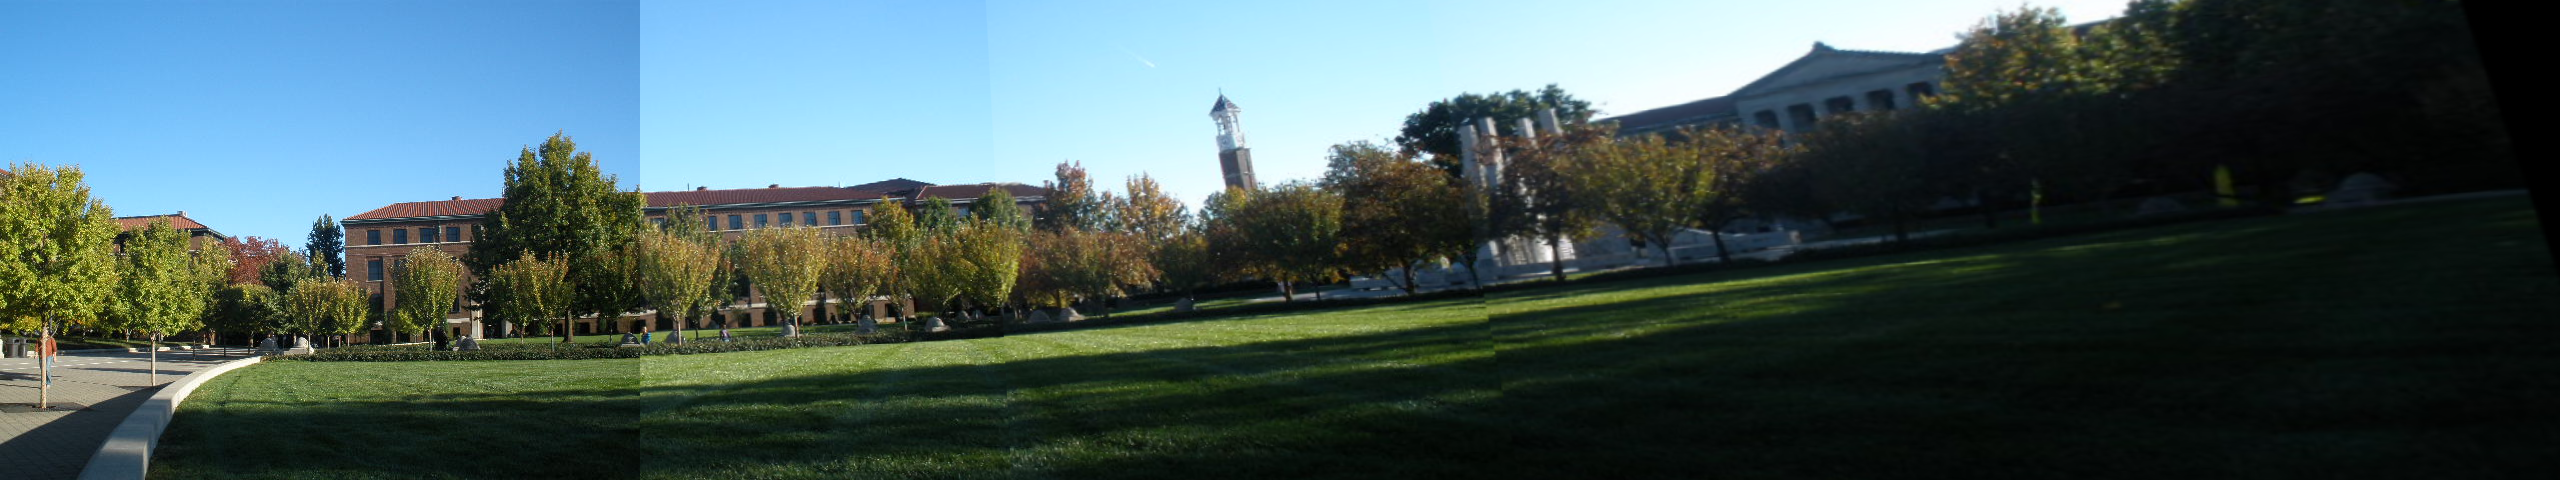

In [43]:
print("Final Panaromic Image")
cv2_imshow(resize_panaroma)

Problem 2b Solution:
Panaromic Mosaicing works better when the camera is only allowed to rotate at its camera centre when capturing images because of the following reasons:
1.   Parallax erros will be minimal, mainly because there are fewer disparities between the images when the camera is rotated about its centre
2.   Computing the aligpanaromic image is easier because translation between consecutive images is not present and will produce more accurately aligned images.
3.   The final stiched image has lesser distortions. Distortions are caused when there is perspective transformations.



